####***The First Cell*** performs the task of Scraping the Comments of an Youtube Video with the help of Youtube API key and Video ID.
####This Scraped Comments is stored into the CSV(Comma Seperated Values) File.

In [2]:
import csv
import os
from googleapiclient.discovery import build
from dotenv import load_dotenv

#load all variables from .env file
load_dotenv()

# actual API key
API_KEY = os.getenv("API_KEY")

# Create a YouTube Data API client
youtube = build('youtube', 'v3', developerKey=API_KEY)

# Video ID of the YouTube video
video_id = 'WfqMmypbACg'

comments_list = []

# Retrieve comments from the video
next_page_token = None

while True:
    comments = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        maxResults=100,
        textFormat='plainText',
        pageToken=next_page_token
    ).execute()

    for comment in comments['items']:
        comment_text = comment['snippet']['topLevelComment']['snippet']['textDisplay']
        comments_list.append(comment_text)

    next_page_token = comments.get('nextPageToken')

    if not next_page_token:
        break

save_path = r"E:\\College\\courses\\Github\\Youtube_Comment_Extraction_and_Sentiment_Analysis\\comments\\Comments.csv"   # ← change to your path

with open(save_path, "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(['Comment'])
    writer.writerows([[comment] for comment in comments_list])

print(f"File saved at: {save_path}")


File saved at: E:\\College\\courses\\Github\\Youtube_Comment_Extraction_and_Sentiment_Analysis\\comments\\Comments.csv


####***The Second Cell*** reads the CSV File which is formed above and divides the comments present in it into Three Sentimental Values

In [7]:
import nltk  # Natural Language Toolkit
nltk.download('vader_lexicon')   # Valence Aware Dictionary and sEntiment Reasoner
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Load CSV
df = pd.read_csv(r'E:\College\courses\Github\Youtube_Comment_Extraction_and_Sentiment_Analysis\comments\Comments.csv')

sid = SentimentIntensityAnalyzer()

# ✅ Clean the Comment column (fixes float/NaN issue)
df['Comment'] = df['Comment'].fillna('').astype(str)

# Function to classify sentiment
def classify_sentiment(comment):
    sentiment_scores = sid.polarity_scores(comment)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# ✅ Apply sentiment classification
df['Sentiment'] = df['Comment'].apply(classify_sentiment)

# ✅ (Optional) Save updated dataset
df.to_csv(r'E:\College\courses\Github\Youtube_Comment_Extraction_and_Sentiment_Analysis\comments\Comments_with_Sentiment.csv', index=False)

print("Sentiment analysis completed. File saved.")


[nltk_data] Downloading package vader_lexicon to C:\Users\Shlok
[nltk_data]     Sonkusare\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis completed. File saved.


In [9]:
data = pd.read_csv('E:\College\courses\Github\Youtube_Comment_Extraction_and_Sentiment_Analysis\comments\Comments_with_Sentiment.csv')

data.head(20)

,Comment,Sentiment
0,👍,neutral
1,I am India but I love all,positive
2,❤,neutral
3,0:04,neutral
4,Bankim Chandra Chatterjee❤,neutral
5,Kon kon 2025 me dekh raha he,neutral
6,Child is God,positive
7,2025😅 0:23,neutral
8,❤❤❤,neutral
9,सम्पूर्ण वन्दे मातरम् के गायन से आक्रांताओं की...,neutral


####***The Third Cell*** performs the task of taking the two components from the DataFrame for the training and testing purpose with the help of Scikit-Learn Library

In [10]:
from sklearn.model_selection import train_test_split

X = data['Comment']
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####***The Fourth Cell*** convert the text data into numerical features using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or Count Vectorization

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fix NaN issues
X_train = X_train.fillna('').astype(str)
X_test = X_test.fillna('').astype(str)

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


####***The Fifth Cell*** performs the following task:
####1. Initializing the ML Models.
####2. Fitting the data into ML models.
####3. Predicting the Values of the classification Report.
####4. Printing the numerical values of the classification report of each model.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize classifiers
logistic_regression = LogisticRegression(max_iter=1000)
svm_classifier = SVC()
naive_bayes = MultinomialNB()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

#Fit the data and Train models
logistic_regression.fit(X_train_tfidf, y_train)
svm_classifier.fit(X_train_tfidf, y_train)
naive_bayes.fit(X_train_tfidf, y_train)
decision_tree.fit(X_train_tfidf, y_train)
knn.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_lr = logistic_regression.predict(X_test_tfidf)
y_pred_svm = svm_classifier.predict(X_test_tfidf)
y_pred_nb = naive_bayes.predict(X_test_tfidf)
y_pred_dt = decision_tree.predict(X_test_tfidf)
y_pred_knn = knn.predict(X_test_tfidf)

# Evaluate models
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.45      0.60        55
     neutral       0.92      0.96      0.94       816
    positive       0.93      0.91      0.92       573

    accuracy                           0.92      1444
   macro avg       0.91      0.77      0.82      1444
weighted avg       0.92      0.92      0.92      1444


SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.49      0.64        55
     neutral       0.92      0.96      0.94       816
    positive       0.93      0.92      0.92       573

    accuracy                           0.92      1444
   macro avg       0.92      0.79      0.83      1444
weighted avg       0.92      0.92      0.92      1444


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.16      0.27        55
     neutral       0.8

####***The Sixth Cell*** perform the task of defining a user-defined function to comparing the valuesand displaying the confusion matrix.
####This cell displays the confusion matrix for Logisitic Regression Model.

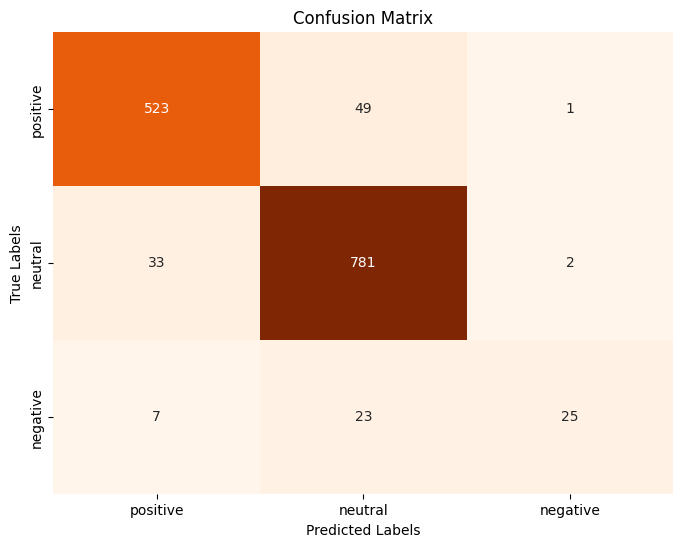

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, labels=['positive', 'neutral', 'negative'])


####***The Seventh Cell*** displays the confusion matrix for Support Vector machine Model.

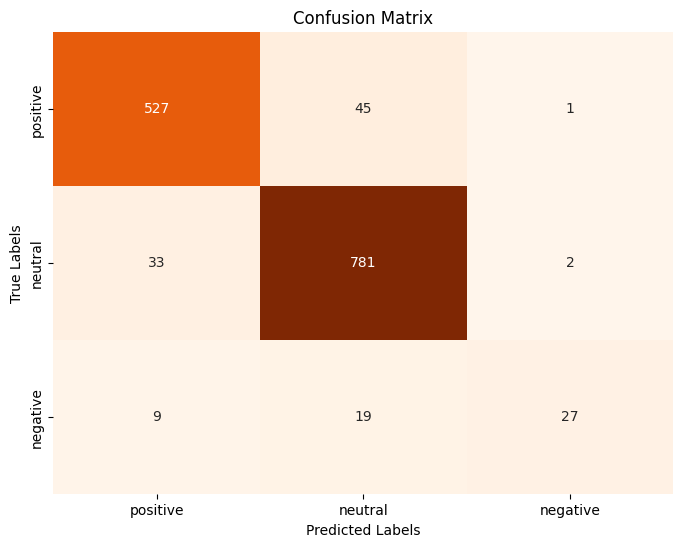

In [15]:
plot_confusion_matrix(y_test, y_pred_svm, labels=['positive', 'neutral', 'negative'])

####***The Eighth Cell*** displays the confusion matrix for Naive Bayes Model.

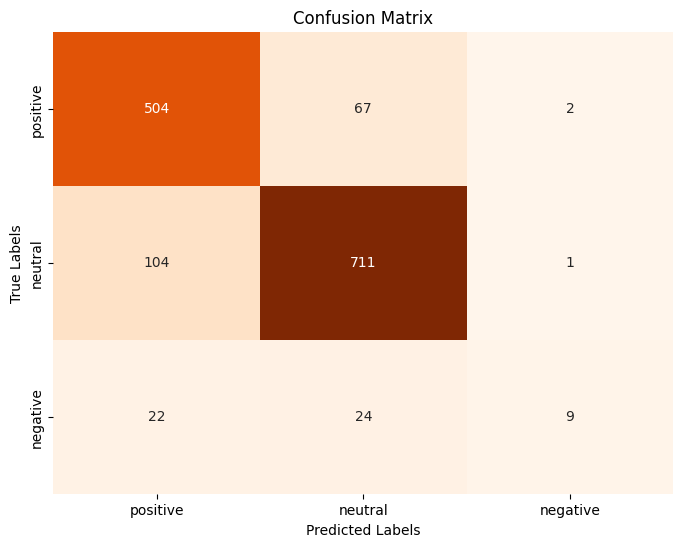

In [16]:
plot_confusion_matrix(y_test, y_pred_nb, labels=['positive', 'neutral', 'negative'])

####***The Nineth Cell*** displays the confusion matrix for Decision Tree Algorithm Model.

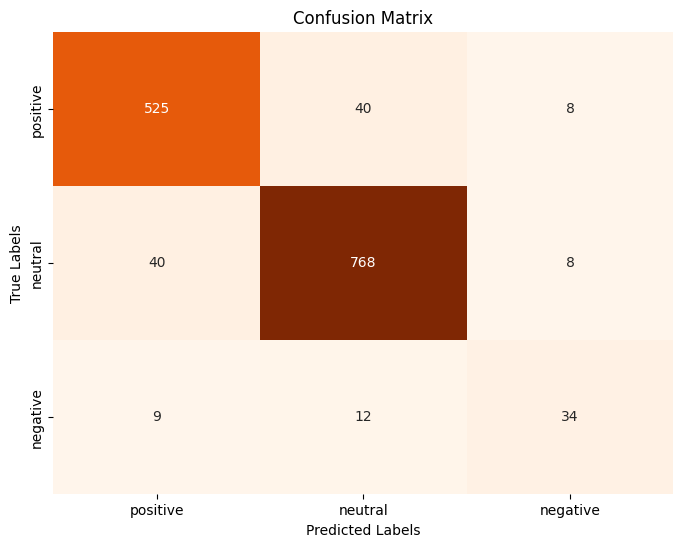

In [17]:
plot_confusion_matrix(y_test, y_pred_dt, labels=['positive', 'neutral', 'negative'])

####***The Tenth Cell*** displays the confusion matrix for K-nearest Neighbors' Model.

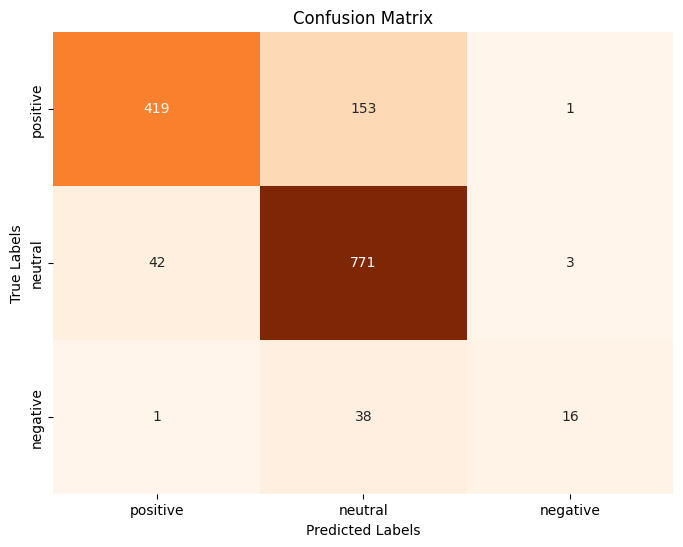

In [18]:
plot_confusion_matrix(y_test, y_pred_knn, labels=['positive', 'neutral', 'negative'])

####***The Eleventh Cell*** performs the task of calculating the Precision Value, Recall Value and F-1 Score Value for all the sentimental values predicted by ML Models
####Also it calculates the accuracy value of each ML Model

In [19]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import numpy as np

# Calculate precision, recall, and F1-score for each model
def calculate_metrics(y_true, y_pred):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=['positive', 'neutral', 'negative'])
    accuracy = accuracy_score(y_true, y_pred)
    return precision, recall, f1, accuracy

precision_lr, recall_lr, f1_lr, accuracy_lr = calculate_metrics(y_test, y_pred_lr)
precision_svm, recall_svm, f1_svm, accuracy_svm = calculate_metrics(y_test, y_pred_svm)
precision_nb, recall_nb, f1_nb, accuracy_nb = calculate_metrics(y_test, y_pred_nb)
precision_dt, recall_dt, f1_dt, accuracy_dt = calculate_metrics(y_test, y_pred_dt)
precision_knn, recall_knn, f1_knn, accuracy_knn = calculate_metrics(y_test, y_pred_knn)

####***The Twelveth Cell*** shows the Bar Plot of all Precision Values for all ML Models based on the Sentimental Values.

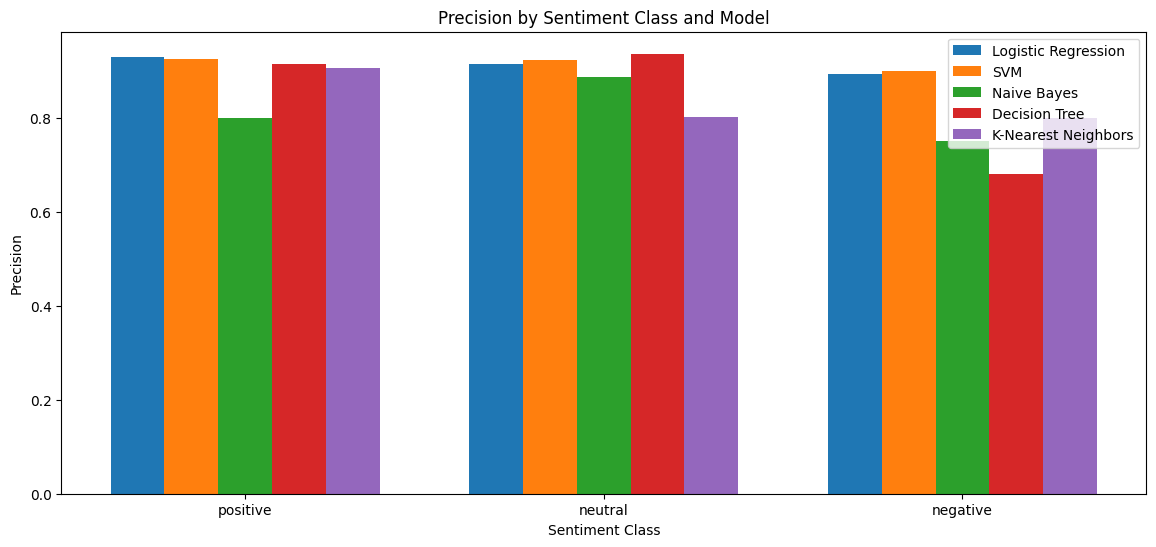

In [20]:
# bar plots
labels = ['positive', 'neutral', 'negative']
x = np.arange(len(labels))
width = 0.15

plt.figure(figsize=(14, 6))
plt.bar(x - (width*2), precision_lr, width, label='Logistic Regression')
plt.bar(x - width, precision_svm, width, label='SVM')
plt.bar(x , precision_nb, width, label='Naive Bayes')
plt.bar(x + width, precision_dt, width, label='Decision Tree')
plt.bar(x + (width*2), precision_knn, width, label='K-Nearest Neighbors')

plt.xlabel('Sentiment Class')
plt.ylabel('Precision')
plt.title('Precision by Sentiment Class and Model')
plt.xticks(x, labels)
plt.legend()
plt.show()

####***The Thirteenth Cell*** shows the Bar Plot of all Recall Values for all ML Models based on the Sentimental Values.

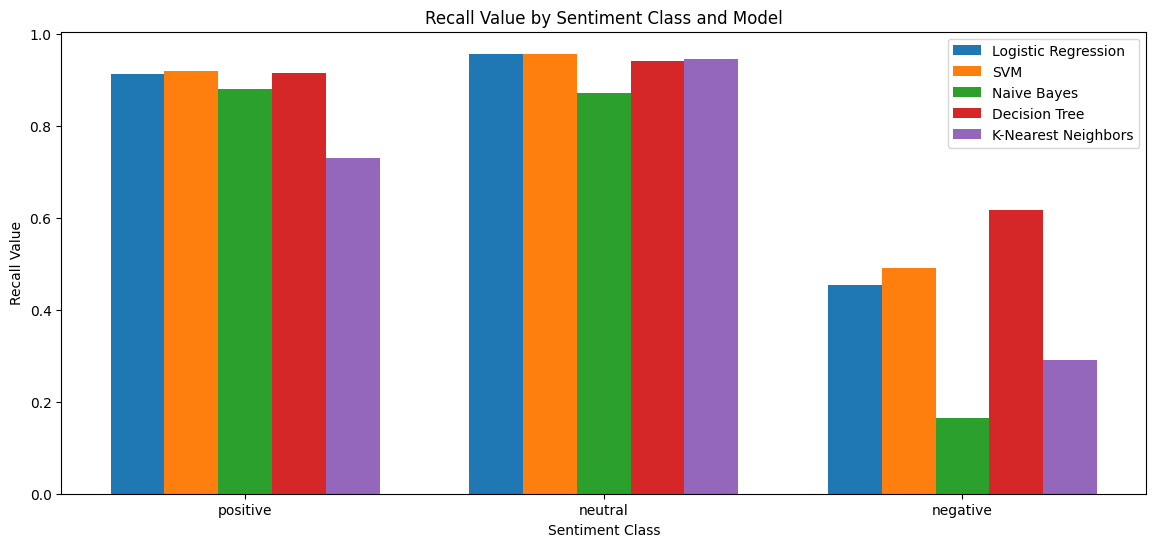

In [21]:
# bar plots
labels = ['positive', 'neutral', 'negative']
x = np.arange(len(labels))
width = 0.15

plt.figure(figsize=(14, 6))
plt.bar(x - (width*2), recall_lr, width, label='Logistic Regression')
plt.bar(x - width, recall_svm, width, label='SVM')
plt.bar(x , recall_nb, width, label='Naive Bayes')
plt.bar(x + width, recall_dt, width, label='Decision Tree')
plt.bar(x + (width*2), recall_knn, width, label='K-Nearest Neighbors')

plt.xlabel('Sentiment Class')
plt.ylabel('Recall Value')
plt.title('Recall Value by Sentiment Class and Model')
plt.xticks(x, labels)
plt.legend()
plt.show()

####***The Fourteenth Cell*** shows the Bar Plot of all F-1 Score Values for all ML Models based on the Sentimental Values.

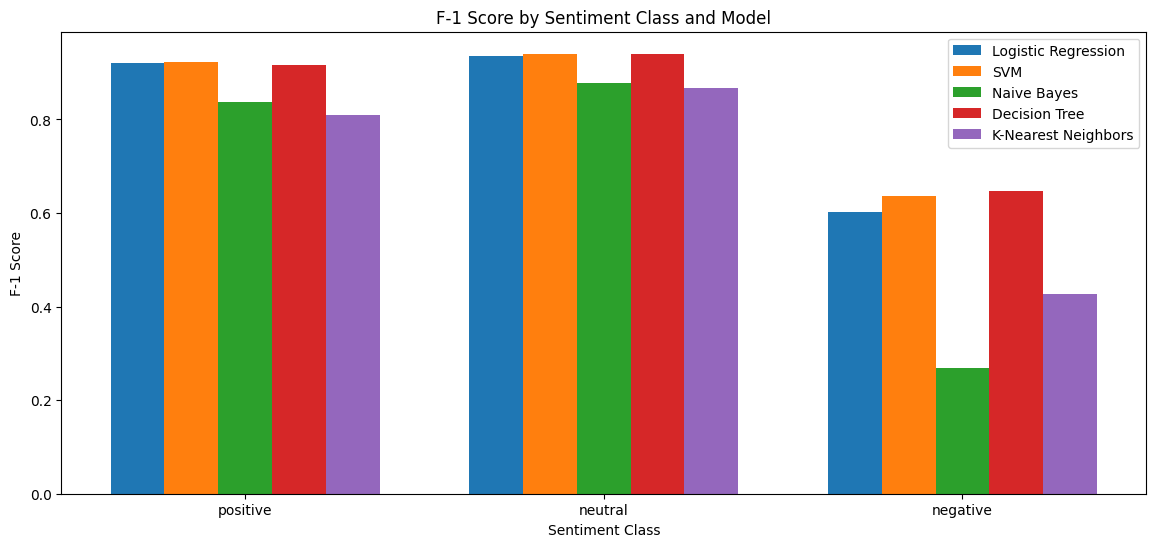

In [22]:
# bar plots
labels = ['positive', 'neutral', 'negative']
x = np.arange(len(labels))
width = 0.15

plt.figure(figsize=(14, 6))
plt.bar(x - (width*2), f1_lr, width, label='Logistic Regression')
plt.bar(x - width, f1_svm, width, label='SVM')
plt.bar(x , f1_nb, width, label='Naive Bayes')
plt.bar(x + width, f1_dt, width, label='Decision Tree')
plt.bar(x + (width*2), f1_knn, width, label='K-Nearest Neighbors')

plt.xlabel('Sentiment Class')
plt.ylabel('F-1 Score')
plt.title('F-1 Score by Sentiment Class and Model')
plt.xticks(x, labels)
plt.legend()

plt.show()

####***The Fifteenth Cell*** shows the Line Plot of all Precision Values for all ML Models based on the Sentimental Values.

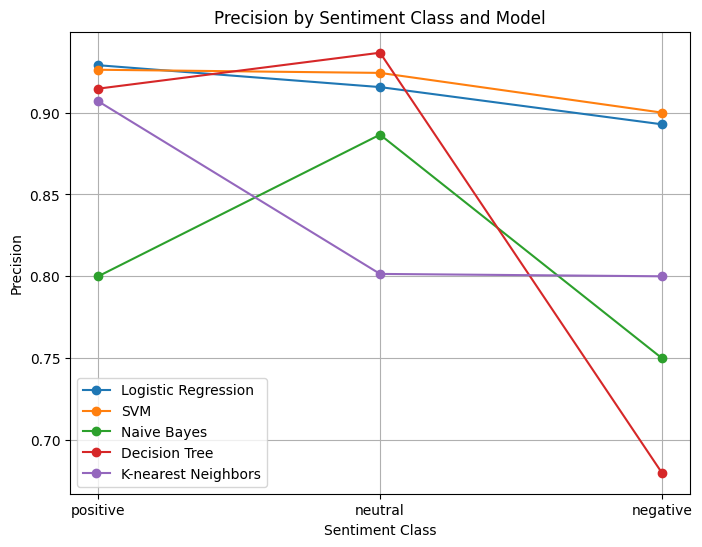

In [23]:
plt.figure(figsize = (8, 6))
plt.plot(labels, precision_lr, marker='o', label='Logistic Regression')
plt.plot(labels, precision_svm, marker='o', label='SVM')
plt.plot(labels, precision_nb, marker='o', label='Naive Bayes')
plt.plot(labels, precision_dt, marker='o', label='Decision Tree')
plt.plot(labels, precision_knn, marker='o', label='K-nearest Neighbors')

plt.xlabel('Sentiment Class')
plt.ylabel('Precision')
plt.title('Precision by Sentiment Class and Model')
plt.legend()
plt.grid(True)
plt.show()


####***The Sixteenth Cell*** shows the Line Plot of all Recall Values for all ML Models based on the Sentimental Values.

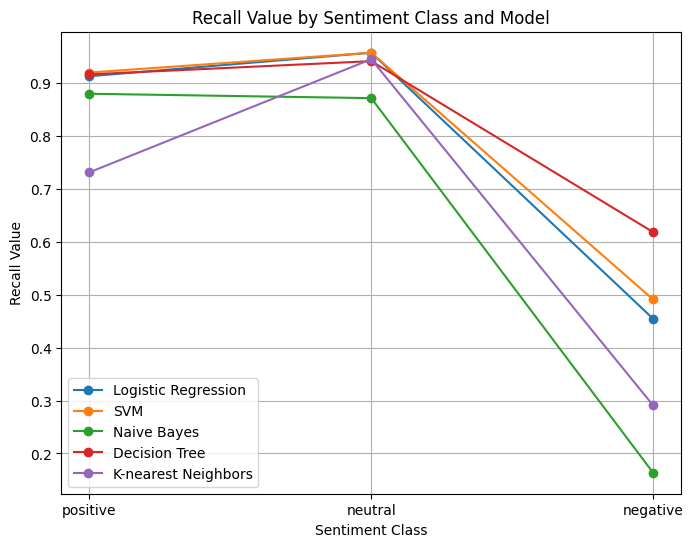

In [24]:
plt.figure(figsize = (8, 6))
plt.plot(labels, recall_lr, marker='o', label='Logistic Regression')
plt.plot(labels, recall_svm, marker='o', label='SVM')
plt.plot(labels, recall_nb, marker='o', label='Naive Bayes')
plt.plot(labels, recall_dt, marker='o', label='Decision Tree')
plt.plot(labels, recall_knn, marker='o', label='K-nearest Neighbors')

plt.xlabel('Sentiment Class')
plt.ylabel('Recall Value')
plt.title('Recall Value by Sentiment Class and Model')
plt.legend()
plt.grid(True)
plt.show()


####***The Seventeenth Cell*** shows the Line Plot of all F-1 Score Values for all ML Models based on the Sentimental Values.

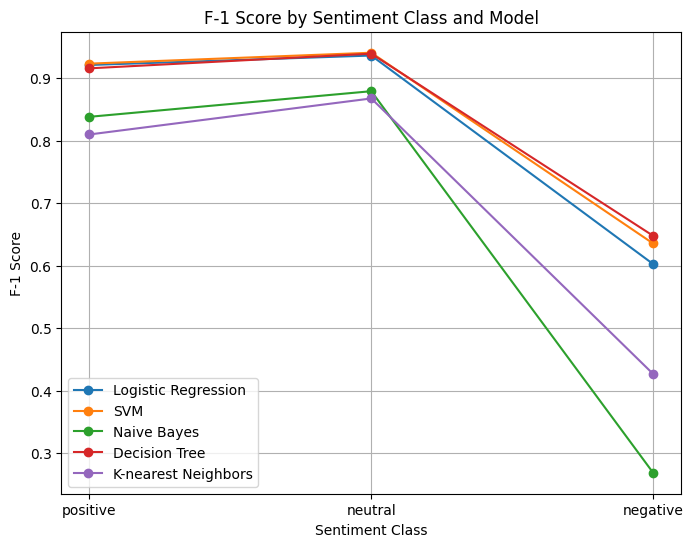

In [25]:
plt.figure(figsize = (8, 6))
plt.plot(labels, f1_lr, marker='o', label='Logistic Regression')
plt.plot(labels, f1_svm, marker='o', label='SVM')
plt.plot(labels, f1_nb, marker='o', label='Naive Bayes')
plt.plot(labels, f1_dt, marker='o', label='Decision Tree')
plt.plot(labels, f1_knn, marker='o', label='K-nearest Neighbors')

plt.xlabel('Sentiment Class')
plt.ylabel('F-1 Score')
plt.title('F-1 Score by Sentiment Class and Model')
plt.legend()
plt.grid(True)
plt.show()


####***The Eighteenth Cell*** shows the Bar Plot of all Accuracy Values for all ML Models.

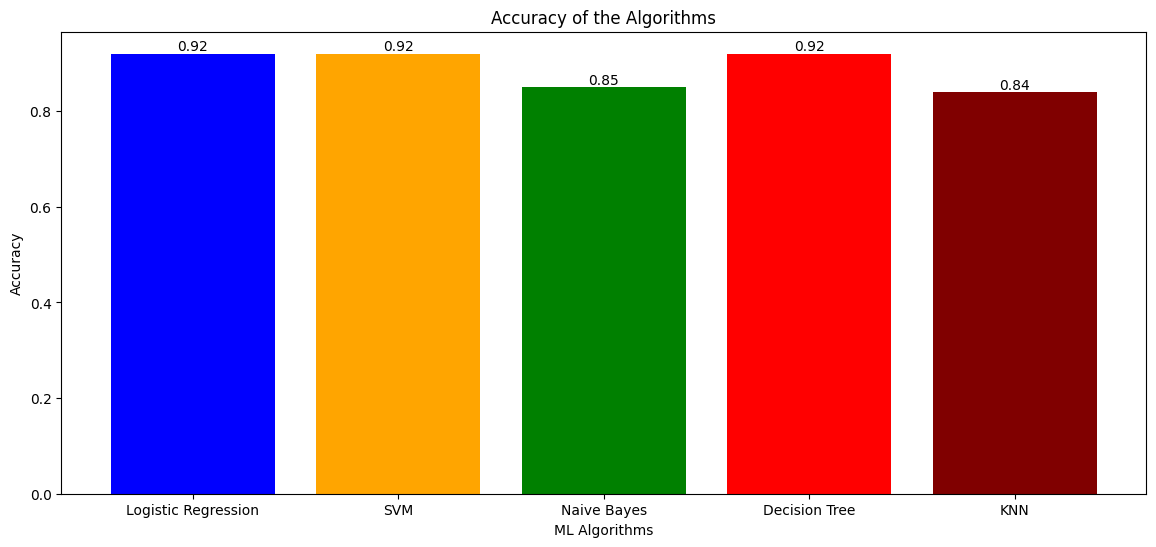

In [26]:
#Bar Plots
Labels = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'KNN']
x = np.arange(len(labels))

accuracy = [round(accuracy_lr,2), round(accuracy_svm,2), round(accuracy_nb,2), round(accuracy_dt,2), round(accuracy_knn,2)]
colors = ['blue', 'orange', 'green', 'red', 'maroon']

plt.figure(figsize=(14, 6))
plt.bar(Labels, accuracy, color=colors)
plt.title("Accuracy of the Algorithms")
plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy")

for i, acc in enumerate(accuracy):
    plt.text(i, acc, str(acc), ha="center", va="bottom")

plt.show()